In [1]:
import timm
import torch.nn as nn

# Number of output classes
num_classes = 7  # Adjust this based on your dataset (e.g., benign vs malignant)

# Load pre-trained ViT model
model = timm.create_model('vit_base_patch16_224', pretrained=True)
model.head = nn.Linear(model.head.in_features, num_classes)  # Adjust for your task


model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

In [2]:
from torchvision import transforms

# Define preprocessing steps
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert to PyTorch tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize for ViT
])


In [3]:
from torch.utils.data import Dataset
from PIL import Image

class SkinLesionDataset(Dataset):
    def __init__(self, image_paths, labels, transform=None):
        self.image_paths = image_paths
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image = Image.open(self.image_paths[idx]).convert('RGB')  # Ensure images are in RGB
        label = self.labels[idx]
        if self.transform:
            image = self.transform(image)
        return image, label


In [4]:
from torchvision.datasets import ImageFolder
from torchvision import transforms
from torch.utils.data import DataLoader

# Define transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize images to 224x224
    transforms.ToTensor(),          # Convert to PyTorch tensors
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize
])

# Paths to train and test directories
train_dir = '/kaggle/input/skin-lesion-input/Skin Lesion Input Dataset/Train_Set_Images'
test_dir = '/kaggle/input/skin-lesion-input/Skin Lesion Input Dataset/Test_Set_Images'

# Load datasets
train_dataset = ImageFolder(root=train_dir, transform=transform)
test_dataset = ImageFolder(root=test_dir, transform=transform)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

In [5]:
import timm
import torch.nn as nn

# Define the number of classes
num_classes = 7  # Your dataset has 7 classes

# Load pre-trained Vision Transformer model
model = timm.create_model('vit_base_patch16_224', pretrained=True)
model.head = nn.Linear(model.head.in_features, num_classes)  # Replace final layer for classification


In [6]:
import torch
from torch.optim import AdamW
from torch.nn import CrossEntropyLoss
from tqdm import tqdm

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

# Define loss function and optimizer
criterion = CrossEntropyLoss()
optimizer = AdamW(model.parameters(), lr=1e-4, weight_decay=1e-4)

# Training loop
num_epochs = 25
for epoch in range(num_epochs):
    model.train()  # Set model to training mode
    running_loss = 0.0
    correct = 0
    total = 0

    # Iterate over batches
    loop = tqdm(train_loader, desc=f'Epoch [{epoch+1}/{num_epochs}]')
    for images, labels in loop:
        images, labels = images.to(device), labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Calculate accuracy
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

        # Update progress bar
        running_loss += loss.item()
        loop.set_postfix(loss=running_loss/total, acc=100. * correct/total)

    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/total:.4f}, Accuracy: {100. * correct/total:.2f}%")


Epoch [1/25]: 100%|██████████| 364/364 [03:39<00:00,  1.66it/s, acc=42.9, loss=0.0897]


Epoch 1/25, Loss: 0.0897, Accuracy: 42.86%


Epoch [2/25]: 100%|██████████| 364/364 [03:30<00:00,  1.73it/s, acc=58.7, loss=0.0659]


Epoch 2/25, Loss: 0.0659, Accuracy: 58.75%


Epoch [3/25]: 100%|██████████| 364/364 [03:31<00:00,  1.72it/s, acc=67.4, loss=0.0538]


Epoch 3/25, Loss: 0.0538, Accuracy: 67.37%


Epoch [4/25]: 100%|██████████| 364/364 [03:31<00:00,  1.72it/s, acc=72.9, loss=0.0447]


Epoch 4/25, Loss: 0.0447, Accuracy: 72.93%


Epoch [5/25]: 100%|██████████| 364/364 [03:31<00:00,  1.72it/s, acc=77.6, loss=0.0365]


Epoch 5/25, Loss: 0.0365, Accuracy: 77.57%


Epoch [6/25]: 100%|██████████| 364/364 [03:31<00:00,  1.72it/s, acc=80.1, loss=0.0321]


Epoch 6/25, Loss: 0.0321, Accuracy: 80.11%


Epoch [7/25]: 100%|██████████| 364/364 [03:31<00:00,  1.72it/s, acc=84.4, loss=0.0261]


Epoch 7/25, Loss: 0.0261, Accuracy: 84.41%


Epoch [8/25]: 100%|██████████| 364/364 [03:31<00:00,  1.72it/s, acc=85.7, loss=0.0239]


Epoch 8/25, Loss: 0.0239, Accuracy: 85.73%


Epoch [9/25]: 100%|██████████| 364/364 [03:31<00:00,  1.72it/s, acc=89.9, loss=0.0171]


Epoch 9/25, Loss: 0.0171, Accuracy: 89.88%


Epoch [10/25]: 100%|██████████| 364/364 [03:31<00:00,  1.72it/s, acc=91.2, loss=0.0149]


Epoch 10/25, Loss: 0.0149, Accuracy: 91.21%


Epoch [11/25]: 100%|██████████| 364/364 [03:31<00:00,  1.72it/s, acc=92.4, loss=0.0131]


Epoch 11/25, Loss: 0.0131, Accuracy: 92.39%


Epoch [12/25]: 100%|██████████| 364/364 [03:31<00:00,  1.72it/s, acc=94.1, loss=0.01]


Epoch 12/25, Loss: 0.0100, Accuracy: 94.11%


Epoch [13/25]: 100%|██████████| 364/364 [03:31<00:00,  1.72it/s, acc=95.1, loss=0.00872]


Epoch 13/25, Loss: 0.0087, Accuracy: 95.14%


Epoch [14/25]: 100%|██████████| 364/364 [03:30<00:00,  1.73it/s, acc=94.8, loss=0.00868]


Epoch 14/25, Loss: 0.0087, Accuracy: 94.81%


Epoch [15/25]: 100%|██████████| 364/364 [03:30<00:00,  1.73it/s, acc=95.1, loss=0.00844]


Epoch 15/25, Loss: 0.0084, Accuracy: 95.12%


Epoch [16/25]: 100%|██████████| 364/364 [03:31<00:00,  1.72it/s, acc=96.8, loss=0.00619]


Epoch 16/25, Loss: 0.0062, Accuracy: 96.82%


Epoch [17/25]: 100%|██████████| 364/364 [03:31<00:00,  1.72it/s, acc=97.1, loss=0.005]


Epoch 17/25, Loss: 0.0050, Accuracy: 97.06%


Epoch [18/25]: 100%|██████████| 364/364 [03:31<00:00,  1.72it/s, acc=97.1, loss=0.00535]


Epoch 18/25, Loss: 0.0054, Accuracy: 97.13%


Epoch [19/25]: 100%|██████████| 364/364 [03:31<00:00,  1.72it/s, acc=96.6, loss=0.00656]


Epoch 19/25, Loss: 0.0066, Accuracy: 96.63%


Epoch [20/25]: 100%|██████████| 364/364 [03:30<00:00,  1.73it/s, acc=97.7, loss=0.00468]


Epoch 20/25, Loss: 0.0047, Accuracy: 97.70%


Epoch [21/25]: 100%|██████████| 364/364 [03:31<00:00,  1.72it/s, acc=97, loss=0.00502]


Epoch 21/25, Loss: 0.0050, Accuracy: 97.05%


Epoch [22/25]: 100%|██████████| 364/364 [03:30<00:00,  1.73it/s, acc=97, loss=0.0056]


Epoch 22/25, Loss: 0.0056, Accuracy: 97.01%


Epoch [23/25]: 100%|██████████| 364/364 [03:30<00:00,  1.73it/s, acc=96.8, loss=0.00569]


Epoch 23/25, Loss: 0.0057, Accuracy: 96.79%


Epoch [24/25]: 100%|██████████| 364/364 [03:31<00:00,  1.72it/s, acc=98.4, loss=0.00306]


Epoch 24/25, Loss: 0.0031, Accuracy: 98.39%


Epoch [25/25]: 100%|██████████| 364/364 [03:31<00:00,  1.72it/s, acc=97.6, loss=0.00448]

Epoch 25/25, Loss: 0.0045, Accuracy: 97.58%


In [7]:
from sklearn.metrics import classification_report

# Set model to evaluation mode
model.eval()

all_preds = []
all_labels = []

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Print classification report
print(classification_report(all_labels, all_preds, target_names=train_dataset.classes))


              precision    recall  f1-score   support

       akiec       0.74      0.81      0.77       197
         bcc       0.74      0.83      0.78       206
         bkl       0.62      0.73      0.67       220
          df       0.90      0.97      0.93       184
         mel       0.79      0.44      0.56       223
          nv       0.75      0.74      0.74       201
        vasc       0.97      1.00      0.98       228

    accuracy                           0.78      1459
   macro avg       0.79      0.79      0.78      1459
weighted avg       0.79      0.78      0.78      1459



In [8]:
torch.save(model.state_dict(), 'vit_skin_lesion_model.pth')


In [9]:
# Load model for inference
model.load_state_dict(torch.load('vit_skin_lesion_model.pth'))
model.eval()


/tmp/ipykernel_23/2026124526.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('vit_skin_lesion_model.pth'))


VisionTransformer(
  (patch_embed): PatchEmbed(
    (proj): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
    (norm): Identity()
  )
  (pos_drop): Dropout(p=0.0, inplace=False)
  (patch_drop): Identity()
  (norm_pre): Identity()
  (blocks): Sequential(
    (0): Block(
      (norm1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
      (attn): Attention(
        (qkv): Linear(in_features=768, out_features=2304, bias=True)
        (q_norm): Identity()
        (k_norm): Identity()
        (attn_drop): Dropout(p=0.0, inplace=False)
        (proj): Linear(in_features=768, out_features=768, bias=True)
        (proj_drop): Dropout(p=0.0, inplace=False)
      )
      (ls1): Identity()
      (drop_path1): Identity()
      (norm2): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
      (mlp): Mlp(
        (fc1): Linear(in_features=768, out_features=3072, bias=True)
        (act): GELU(approximate='none')
        (drop1): Dropout(p=0.0, inplace=False)
        (norm): Identity(

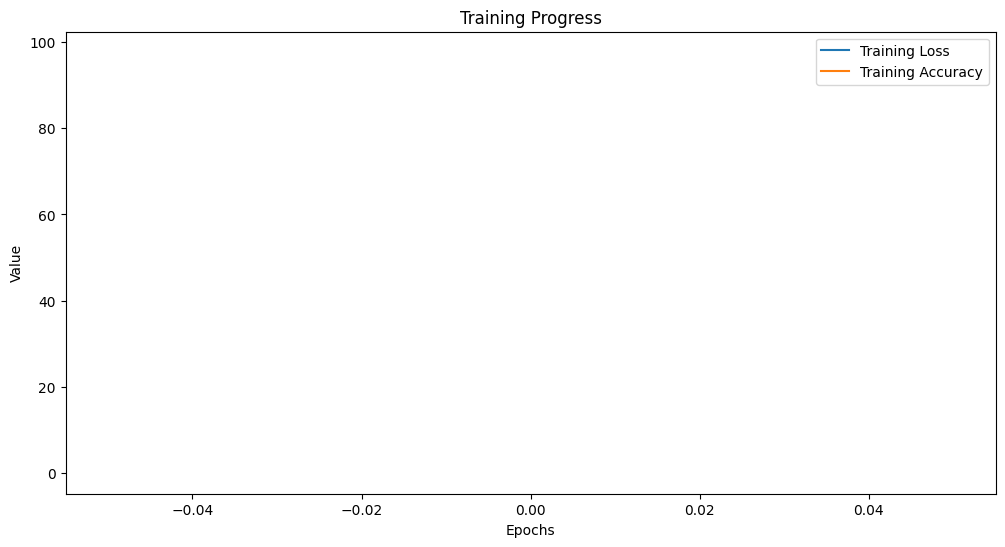

In [10]:
import matplotlib.pyplot as plt

# Store loss and accuracy
train_losses = []
train_accuracies = []

# During training loop, append loss and accuracy
train_losses.append(running_loss/total)
train_accuracies.append(100. * correct/total)

# Plot after training
plt.figure(figsize=(12, 6))
plt.plot(train_losses, label='Training Loss')
plt.plot(train_accuracies, label='Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.title('Training Progress')
plt.show()
